In [4]:
# The Williams Percenage Calculation (%R) - XRP

In [5]:
! pip install yfinance pandas matplotlib

[*********************100%%**********************]  1 of 1 completed


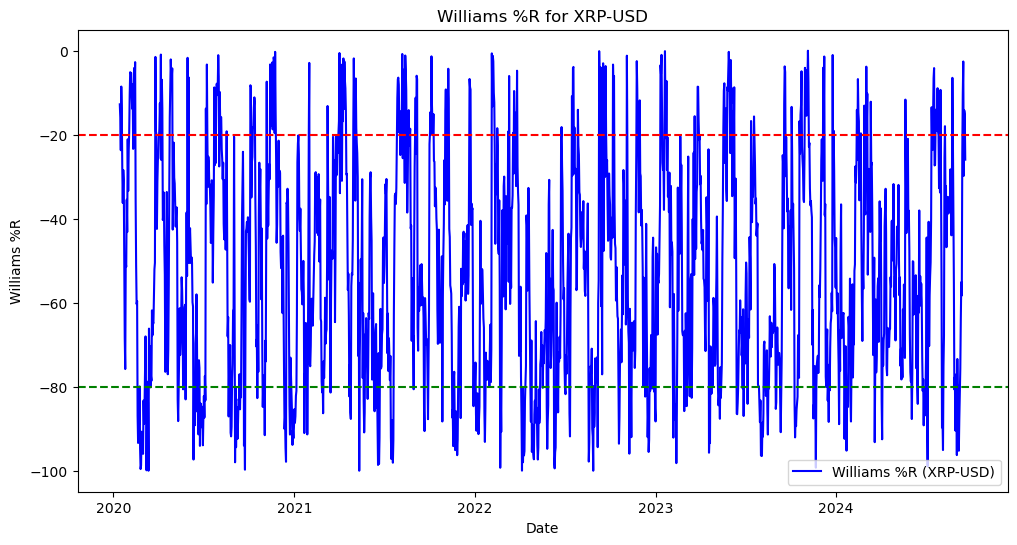

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for XRP-USD from Yahoo Finance
def fetch_data(ticker, start_date):
    data = yf.download(ticker, start=start_date)
    return data

# Calculate Williams %R
def williams_r(data, lookback_period=14):
    highest_high = data['High'].rolling(window=lookback_period).max()
    lowest_low = data['Low'].rolling(window=lookback_period).min()
    williams_r = (highest_high - data['Close']) / (highest_high - lowest_low) * -100
    data['Williams %R'] = williams_r
    return data

# Plotting Williams %R
def plot_williams_r(data, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Williams %R'], label=f'Williams %R ({ticker})', color='blue')
    plt.axhline(-20, color='red', linestyle='--')  # Overbought line
    plt.axhline(-80, color='green', linestyle='--')  # Oversold line
    plt.title(f'Williams %R for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Williams %R')
    plt.legend()
    plt.show()

# Main function to execute
def main():
    ticker = 'XRP-USD'
    start_date = '2020-01-01'
    lookback_period = 14
    
    # Fetch data
    data = fetch_data(ticker, start_date)
    
    # Calculate Williams %R
    data = williams_r(data, lookback_period)
    
    # Plot the results
    plot_williams_r(data, ticker)

if __name__ == "__main__":
    main()


In [8]:
### Explanation:
# Data Fetching: We fetch historical price data for XRP-USD using the yfinance library.
# Williams %R Calculation: For each closing price, the highest high and lowest low over the past 14 periods (or any chosen period) are calculated, and the Williams %R is computed.
# Plotting: We plot the Williams %R values along with horizontal lines at -20 and -80 to indicate overbought and oversold levels. ###

In [9]:
### Result Interpretation:
# Overbought: When Williams %R is above -20, XRP might be overbought, signaling a potential downward correction.
# Oversold: When Williams %R is below -80, XRP might be oversold, signaling a potential upward correction. ###